In [1]:
import pandas as pd
import os
import librosa
from pyaudio_features import *
import matplotlib.pyplot as plt
import numpy as np
from plots import *

wavs, labels = data_import('..\\raw_data')

band_0 = wavs[0]
band_1 = wavs[52]
band_2 = wavs[101]
band_3 = wavs[151]

# Paths to your WAV files
wav_files = [band_0,band_1,band_2,band_3]
labels = ['Dream Theater', 'Gojira', 'Opeth', 'Symphony X']

### Plot wavs

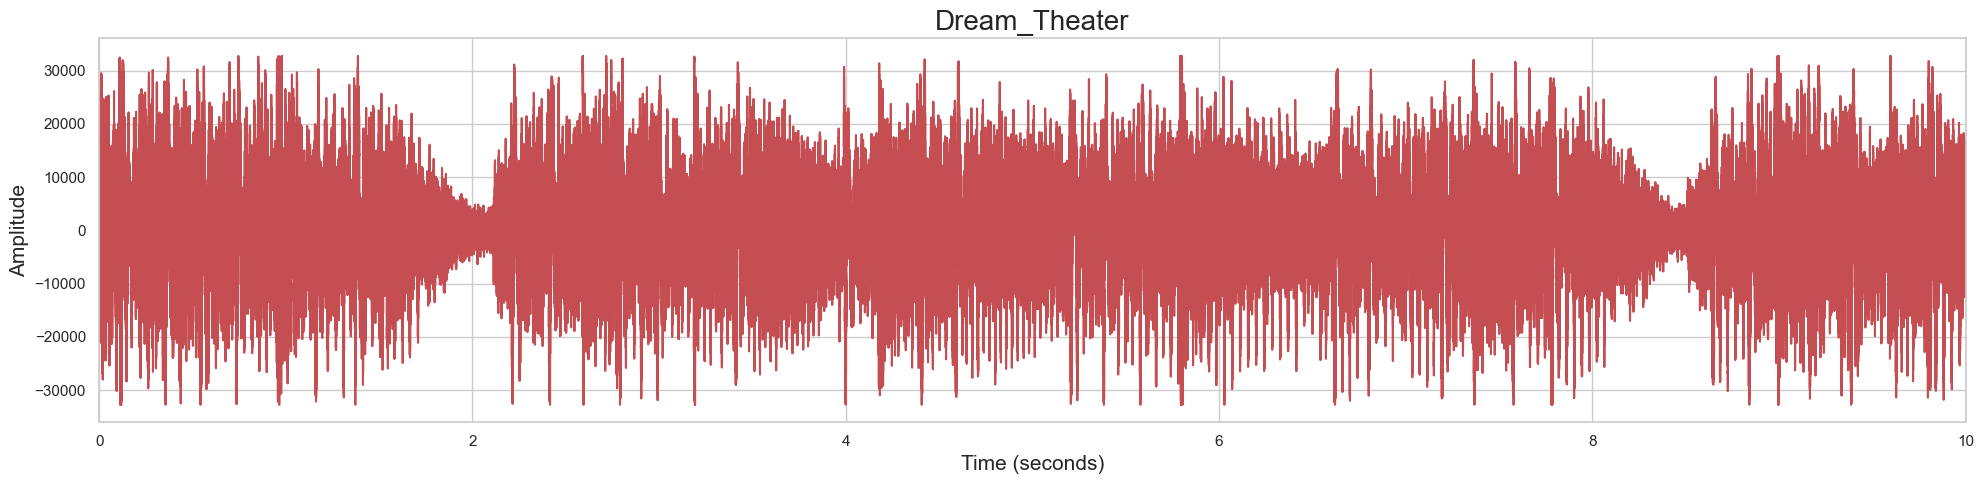

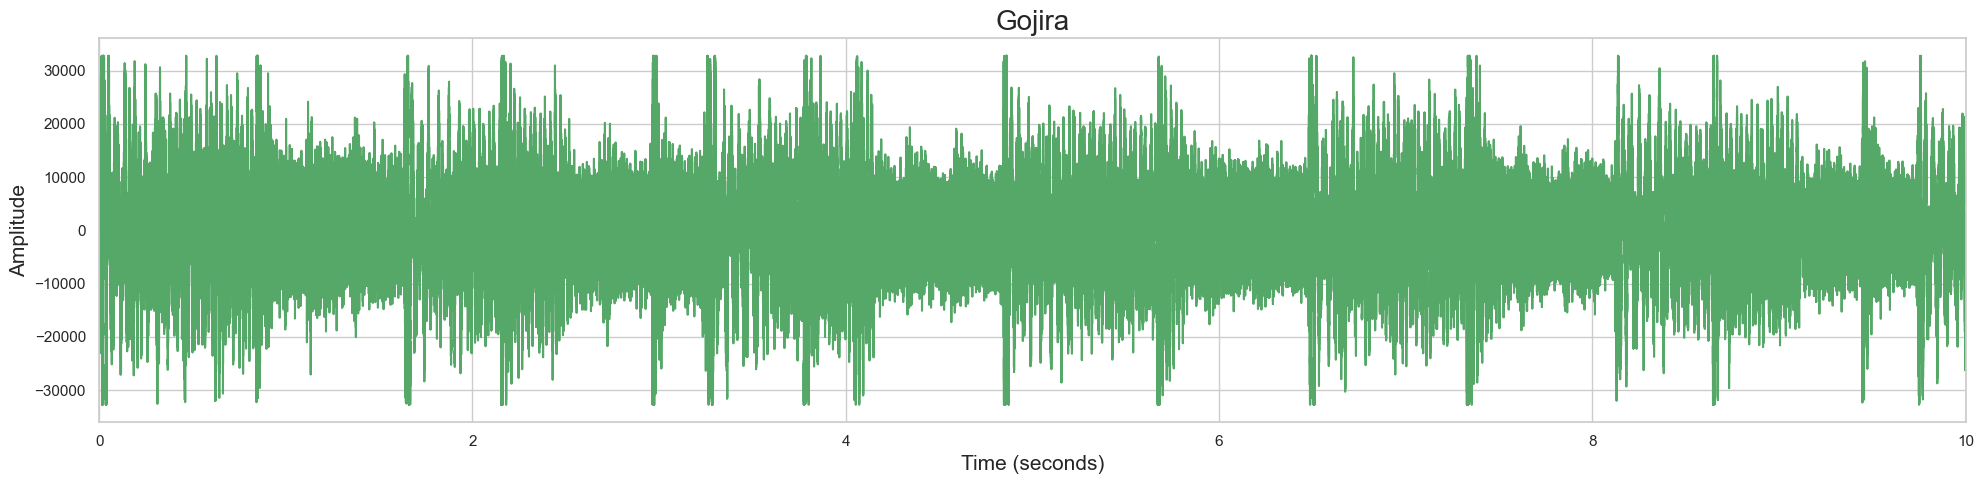

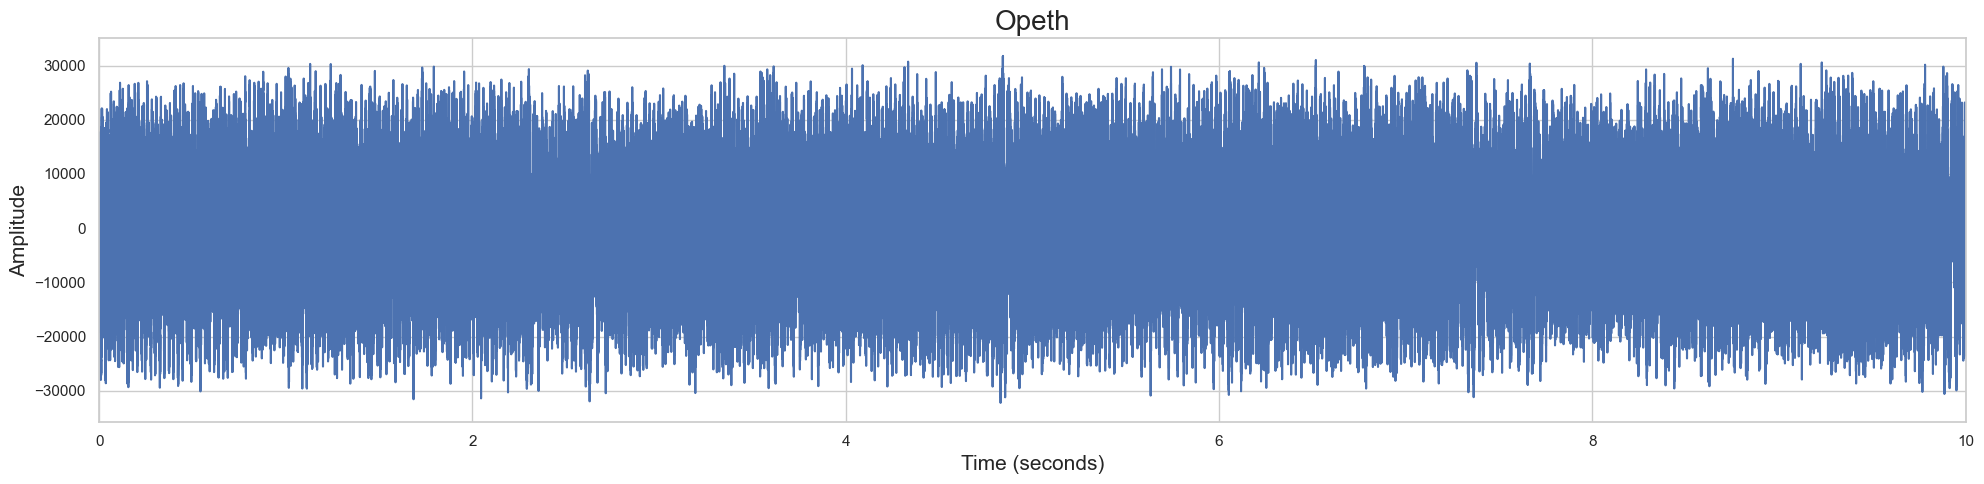

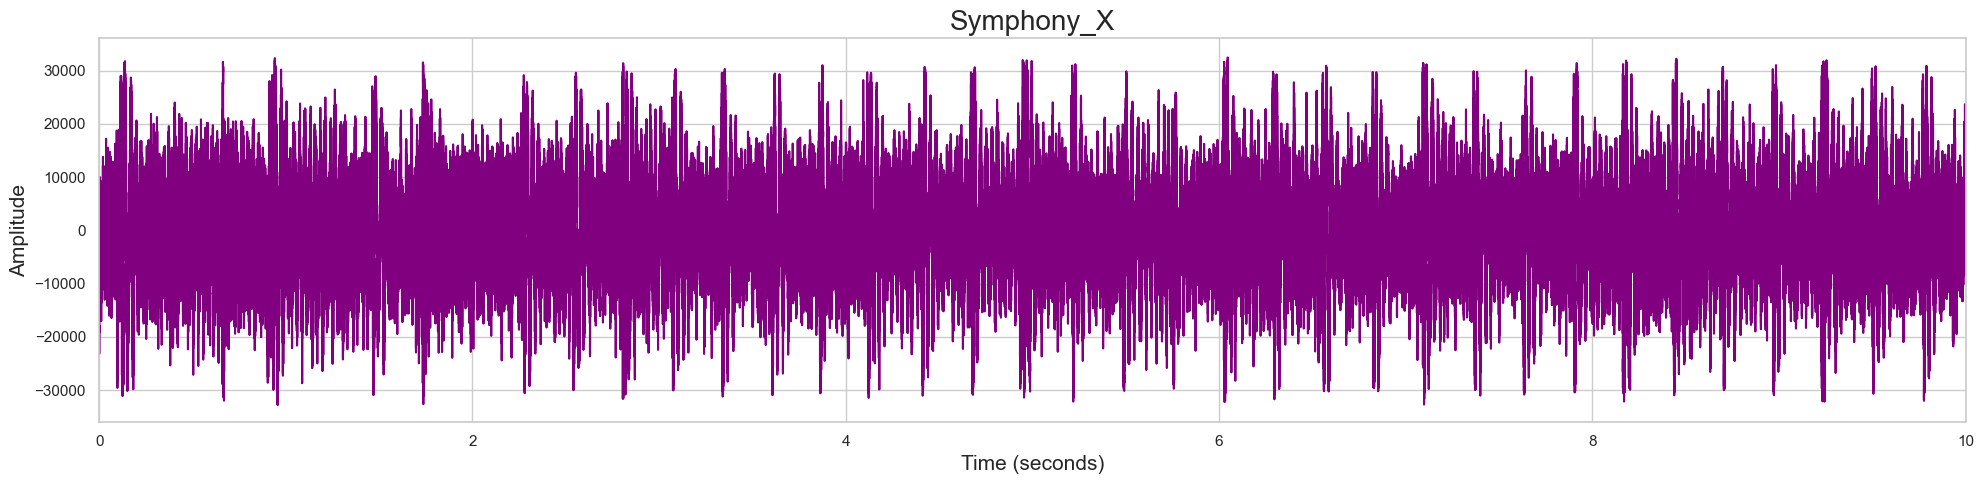

In [2]:

plot_wav(band_0,'Dream_Theater',color='r')
plot_wav(band_1,'Gojira',color='g')
plot_wav(band_2,'Opeth',color='b')
plot_wav(band_3,'Symphony_X',color='purple')

### Plot ZCR

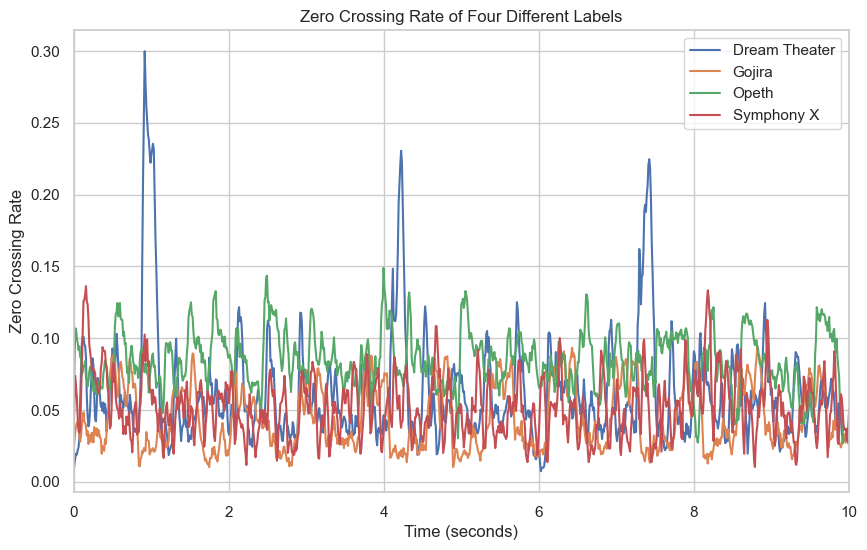

In [4]:
plot_zcr(wav_files,labels)

In [ ]:
plot_mfcc(wav_files,labels)

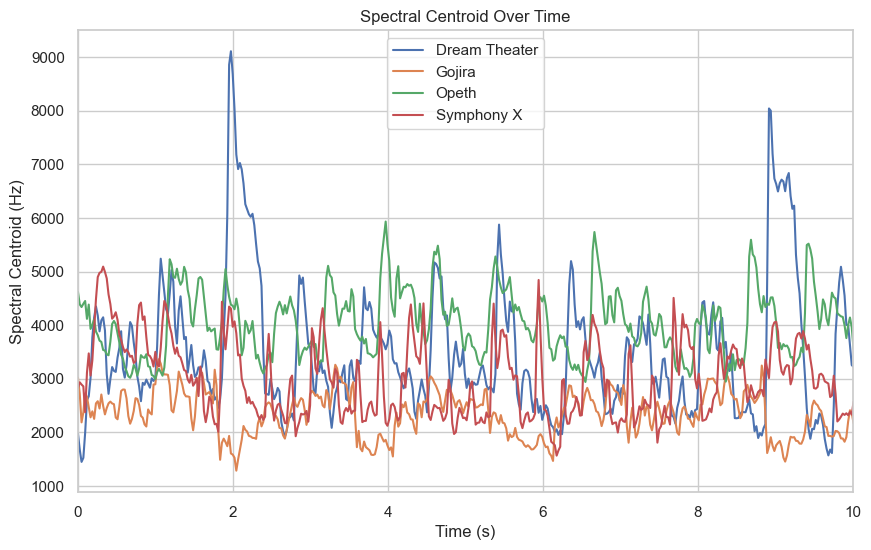

In [3]:
plot_centroid(wav_files,labels)

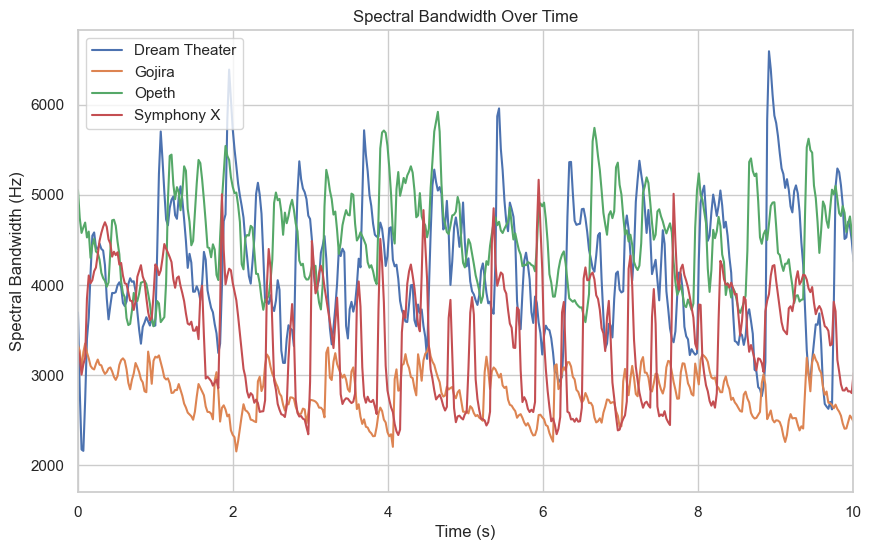

In [10]:
def plot_bandwidth(wav_files, labels):
    plt.figure(figsize=(10, 6))
    for wav_file, label in zip(wav_files, labels):
        y, sr = librosa.load(wav_file, sr=None)

        bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        times = librosa.times_like(bandwidth)
        plt.plot(times, bandwidth[0], label=label)

    plt.xlabel('Time (s)')
    plt.ylabel('Spectral Bandwidth (Hz)')
    plt.title('Spectral Bandwidth Over Time')
    plt.legend()
    plt.xlim(0,10)
    plt.show()

plot_bandwidth(wav_files,labels)

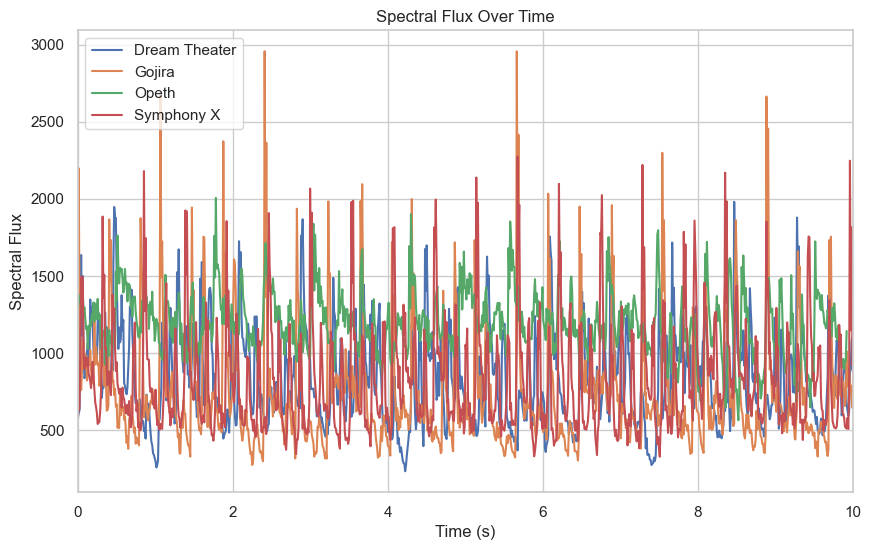

In [11]:
def plot_flux(wav_files, labels):
    plt.figure(figsize=(10, 6))
    
    for wav_file, label in zip(wav_files, labels):
        y, sr = librosa.load(wav_file, sr=None)
        # Compute the spectrogram magnitude and its first-order difference
        S = np.abs(librosa.stft(y))
        S_diff = np.abs(np.diff(S, axis=1))
        flux = np.sum(S_diff, axis=0)
        
        times = librosa.times_like(flux, sr=sr, hop_length=512)
        plt.plot(times, flux, label=label)
    
    plt.xlabel('Time (s)')
    plt.ylabel('Spectral Flux')
    plt.title('Spectral Flux Over Time')
    plt.legend()
    plt.xlim(0,10)
    plt.show()

plot_flux(wav_files,labels)

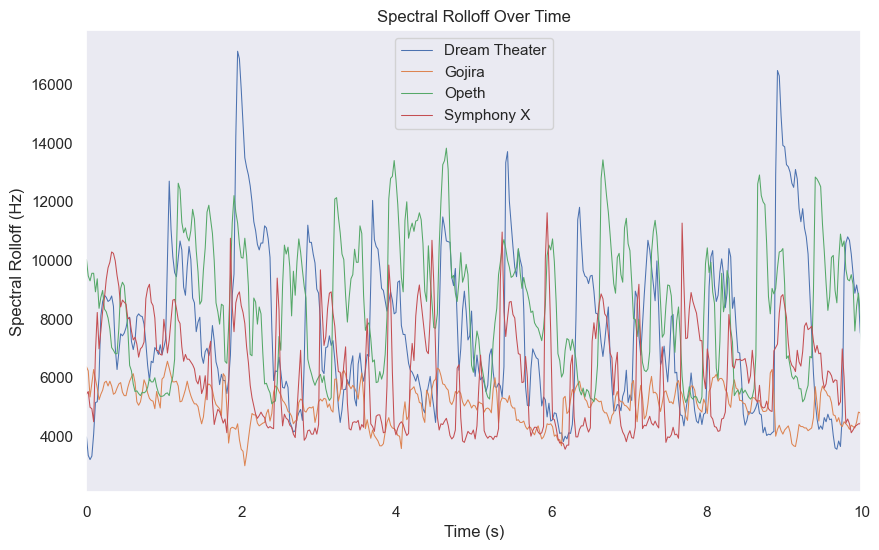

In [19]:
import seaborn as sns  # Import Seaborn

# Set the Seaborn style
sns.set(style="darkgrid")

def plot_rolloff(wav_files, labels):
    sns.set(style="dark")
    plt.figure(figsize=(10, 6))
    
    for wav_file, label in zip(wav_files, labels):
        y, sr = librosa.load(wav_file, sr=None)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        
        times = librosa.times_like(rolloff)
        plt.plot(times, rolloff[0], label=label, linewidth=0.75)
    
    plt.xlabel('Time (s)')
    plt.ylabel('Spectral Rolloff (Hz)')
    plt.title('Spectral Rolloff Over Time')
    plt.legend()
    plt.xlim(0,10)
    plt.show()

plot_rolloff(wav_files,labels)